In [1]:
pip install pandas

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pyspark
import pandas
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
spark = SparkSession(sc)

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/02/18 11:55:08 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
pip install numpy==1.20

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import shap
import sklearn
from sklearn.ensemble import RandomForestRegressor

wine_data = spark.read.csv('data/winequality-red.csv', header=True, inferSchema=True,sep = ';' )
wine_data = wine_data.toPandas()
y = wine_data['quality']
X = wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]


# a simple linear model
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X, y)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

In [6]:
# print("Model coefficients:\n")
# for i in range(X.shape[1]):
#     print(X.columns[i], "=", model.coef_[i].round(8))

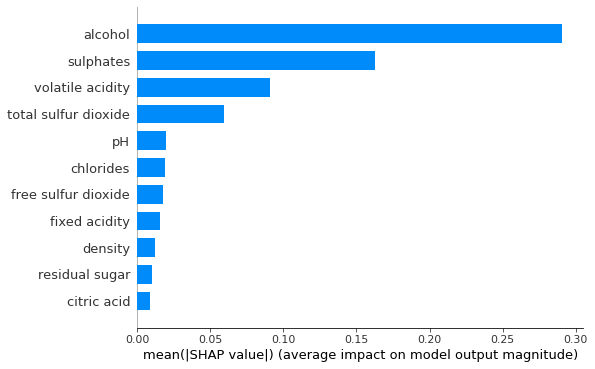

In [9]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")


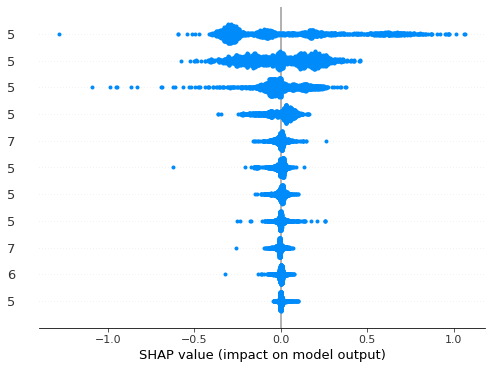

OSError: [Errno 30] Read-only file system: '/summary_plot1.png'

In [14]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, y)


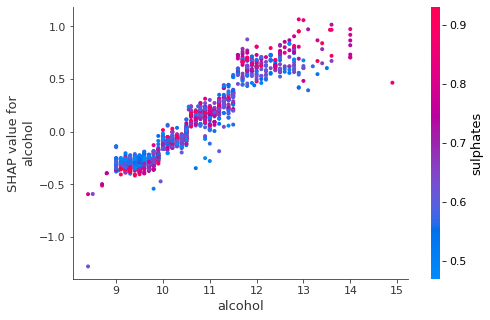

In [16]:
shap.dependence_plot('alcohol', shap_values, X)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

In [18]:
import numpy as np

# Get the predictions and put them with the test data.
X_output = y.copy()
X_output.loc[:,'predict'] = np.round(model.predict(X_output),2)

# Randomly pick some observations
random_picks = np.arange(1,330,50) # Every 50 rows
S = X_output.iloc[random_picks]

# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

shap_plot(0)

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


ValueError: Expected 2D array, got 1D array instead:
array=[5. 5. 5. ... 6. 5. 6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.